# Analyzing GDP per capita, Share of agricultural employment, and education.
Using data from WDI and ILOSTAT.

In [29]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
## Import data
data_WB = pd.read_excel('Data\P_Data_Extract_From_World_Development_Indicators.xlsx')

In [31]:
data_WB

,Country Name,Country Code,Series Name,Series Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,63.256091,62.640624,61.637175,60.871906,59.852654,59.00254,...,47.697315,44.798594,44.593516,44.337137,43.989031,44.4536,45.01604,45.983408,46.587823,46.58907
1,Afghanistan,AFG,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,..,..,..,..,..,..,...,..,..,9.79236,..,..,..,..,..,9.46131,12.59733
2,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1292.333437,1260.060581,1352.320627,1366.993146,1528.344578,1556.844452,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1516.273265,..
3,Albania,ALB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,47.995341,47.600788,46.962718,46.35776,45.493462,44.656033,...,44.198027,42.257063,41.283525,40.040852,38.078346,37.285732,36.416856,36.190744,35.640848,34.926718
4,Albania,ALB,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,..,..,..,..,..,39.88932,...,..,..,..,..,46.35334,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_WB['Series Name'].unique()

array(['Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
       'GDP per capita, PPP (constant 2017 international $)', nan],
      dtype=object)

## Cleaning and merging data

In [33]:
### Pivot the WB data. Have each Series as a column.
## First, create two new dataframes. One for each series.

## GDP
GDP_DF = data_WB[data_WB['Series Name'] == 'GDP per capita, PPP (constant 2017 international $)']

## Agricultural Employment
Agri_Emp_DF = data_WB[data_WB['Series Name'] == 'Employment in agriculture (% of total employment) (modeled ILO estimate)']

## Educational Attainment
Edu_DF = data_WB[data_WB['Series Name'] == 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)']

In [34]:
## Have each year as a row.
GDP_DF = GDP_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'GDP')
Agri_Emp_DF = Agri_Emp_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'Agri_Emp')
Edu_DF = Edu_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'Edu')

In [35]:
Agri_Emp_DF

,Country Name,Country Code,Series Name,Series Code,Year,Agri_Emp
0,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2003 [YR2003],63.256091
1,Albania,ALB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2003 [YR2003],47.995341
2,Algeria,DZA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2003 [YR2003],21.722026
3,American Samoa,ASM,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2003 [YR2003],..
4,Andorra,AND,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2003 [YR2003],..
...,...,...,...,...,...,...
4335,Virgin Islands (U.S.),VIR,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2022 [YR2022],1.293486
4336,West Bank and Gaza,PSE,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2022 [YR2022],6.220994
4337,"Yemen, Rep.",YEM,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2022 [YR2022],29.260987
4338,Zambia,ZMB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2022 [YR2022],57.314602


In [36]:
## Keep only the first 4 characters of the year.
GDP_DF['Year'] = GDP_DF['Year'].str[:4]
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].str[:4]
Edu_DF['Year'] = Edu_DF['Year'].str[:4]

## Convert the year to integer.
GDP_DF['Year'] = GDP_DF['Year'].astype(int)
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].astype(int)
Edu_DF['Year'] = Edu_DF['Year'].astype(int)

In [37]:
Edu_DF

,Country Name,Country Code,Series Name,Series Code,Year,Edu
0,Afghanistan,AFG,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2003,..
1,Albania,ALB,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2003,..
2,Algeria,DZA,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2003,..
3,American Samoa,ASM,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2003,..
4,Andorra,AND,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2003,42.303871
...,...,...,...,...,...,...
4335,Virgin Islands (U.S.),VIR,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2022,..
4336,West Bank and Gaza,PSE,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2022,..
4337,"Yemen, Rep.",YEM,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2022,..
4338,Zambia,ZMB,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,2022,..


In [38]:
GDP_DF

,Country Name,Country Code,Series Name,Series Code,Year,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2003,1292.333437
1,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2003,7154.030284
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2003,9835.161709
3,American Samoa,ASM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2003,..
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2003,..
...,...,...,...,...,...,...
4335,Virgin Islands (U.S.),VIR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,..
4336,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,5722.409175
4337,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,..
4338,Zambia,ZMB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,3365.87378


In [39]:
### Merge all dataframes.
ALL_VAR_DF = pd.merge(GDP_DF[['Country Name', 'Country Code', 'Year', 'GDP']], Agri_Emp_DF[['Country Name', 'Country Code', 'Year', 'Agri_Emp']], left_on = ['Country Name', 'Year'], right_on = ['Country Name', 'Year'], how = 'outer')
ALL_VAR_DF = pd.merge(ALL_VAR_DF, Edu_DF[['Country Name', 'Country Code', 'Year', 'Edu']], left_on = ['Country Name', 'Year'], right_on = ['Country Name', 'Year'], how = 'outer')

In [40]:
## Convert GDP, Proportion_Upper_Sec and Agri_Emp to numeric.
ALL_VAR_DF['GDP'] = pd.to_numeric(ALL_VAR_DF['GDP'], errors = 'coerce')
ALL_VAR_DF['Edu'] = pd.to_numeric(ALL_VAR_DF['Edu'], errors = 'coerce')
ALL_VAR_DF['Agri_Emp'] = pd.to_numeric(ALL_VAR_DF['Agri_Emp'], errors = 'coerce')

In [41]:
ALL_VAR_DF[ALL_VAR_DF['Country Name'] == 'Thailand']

,Country Name,Country Code_x,Year,GDP,Country Code_y,Agri_Emp,Country Code,Edu
192,Thailand,THA,2003,11220.683301,THA,44.902624,THA,NaN
409,Thailand,THA,2004,11828.839043,THA,44.330282,THA,22.643629
626,Thailand,THA,2005,12228.660905,THA,43.854896,THA,NaN
843,Thailand,THA,2006,12739.737716,THA,43.388974,THA,22.569960
1060,Thailand,THA,2007,13330.208876,THA,42.855782,THA,NaN
1277,Thailand,THA,2008,13459.246520,THA,41.393760,THA,NaN
1494,Thailand,THA,2009,13270.617614,THA,39.847003,THA,NaN
1711,Thailand,THA,2010,14172.218056,THA,38.244488,THA,27.338110
1928,Thailand,THA,2011,14199.279515,THA,41.008459,THA,NaN
2145,Thailand,THA,2012,15129.900934,THA,42.142986,THA,NaN


In [42]:
### Create Dataframe containing countries which had similar level of GDP as Thailand in 2003
Thai_GDP_2003 = ALL_VAR_DF[(ALL_VAR_DF['Country Name'] == 'Thailand') & (ALL_VAR_DF['Year'] == 2003)]['GDP'].values[0]
range_gdp = [Thai_GDP_2003 *0.8, Thai_GDP_2003 * 1.2]

## Get names of countries with similar level of GDP as Thailand in 2003.
Similar_GDP_Countries = ALL_VAR_DF[(ALL_VAR_DF['GDP'] >= range_gdp[0]) & (ALL_VAR_DF['GDP'] <= range_gdp[1]) & (ALL_VAR_DF['Year'] == 2003)]['Country Name'].unique()

Similar_GDP_Countries

array(['Algeria', 'Belarus', 'Belize', 'Botswana', 'Brazil', 'Bulgaria',
       'Colombia', 'Costa Rica', 'Dominica', 'Dominican Republic', 'Fiji',
       'Grenada', 'Iran, Islamic Rep.', 'Jamaica', 'Jordan', 'Mauritius',
       'Montenegro', 'North Macedonia', 'Serbia', 'South Africa',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Thailand',
       'Ukraine', 'Uruguay'], dtype=object)

In [91]:
### Create Dataframe containing countries which had similar level of Educational Attainment as Thailand in 2004.
Thai_Edu_2004 = ALL_VAR_DF[(ALL_VAR_DF['Country Name'] == 'Thailand') & (ALL_VAR_DF['Year'] == 2004)]['Edu'].values[0]
range_edu = [Thai_Edu_2004 - 7.5, Thai_Edu_2004 + 7.5]

## Get names of countries with similar level of Educational Attainment as Thailand in 2004.
Similar_Edu_Countries = ALL_VAR_DF[(ALL_VAR_DF['Edu'] >= range_edu[0]) & (ALL_VAR_DF['Edu'] <= range_edu[1]) & (ALL_VAR_DF['Year'] == 2004)]['Country Name'].unique()

Similar_Edu_Countries

array(['Bolivia', 'Brazil', 'Costa Rica', 'Dominican Republic',
       'El Salvador', 'Honduras', 'Mexico', 'Paraguay', 'Portugal',
       'Thailand', 'Turkiye'], dtype=object)

In [44]:
## Create Dataframe containing countries in Similar_GDP_Countries.

Similar_Countries_DF_GDP = ALL_VAR_DF[ALL_VAR_DF['Country Name'].isin(Similar_GDP_Countries)]

In [45]:
Similar_Countries_DF_GDP

,Country Name,Country Code_x,Year,GDP,Country Code_y,Agri_Emp,Country Code,Edu
2,Algeria,DZA,2003,9835.161709,DZA,21.722026,DZA,NaN
17,Belarus,BLR,2003,9660.193113,BLR,17.219478,BLR,NaN
19,Belize,BLZ,2003,9566.363690,BLZ,21.997435,BLZ,NaN
25,Botswana,BWA,2003,12054.722996,BWA,21.219332,BWA,NaN
26,Brazil,BRA,2003,11733.411198,BRA,15.566475,BRA,28.09
...,...,...,...,...,...,...,...,...
4305,St. Lucia,LCA,2022,15100.286008,LCA,10.529955,LCA,NaN
4307,St. Vincent and the Grenadines,VCT,2022,14572.607030,VCT,9.710520,VCT,NaN
4315,Thailand,THA,2022,17507.620193,THA,30.423247,THA,NaN
4326,Ukraine,UKR,2022,10731.440430,UKR,NaN,UKR,NaN


In [46]:
## Create Dataframe containing countries in Similar_Edu_Countries.

Similar_Countries_DF_EDU = ALL_VAR_DF[ALL_VAR_DF['Country Name'].isin(Similar_Edu_Countries)]

Similar_Countries_DF_EDU

,Country Name,Country Code_x,Year,GDP,Country Code_y,Agri_Emp,Country Code,Edu
23,Bolivia,BOL,2003,5387.581774,BOL,35.083160,BOL,NaN
26,Brazil,BRA,2003,11733.411198,BRA,15.566475,BRA,28.090000
46,Costa Rica,CRI,2003,13333.217257,CRI,15.208472,CRI,30.020000
56,Dominican Republic,DOM,2003,9351.323951,DOM,14.264522,DOM,25.670000
59,El Salvador,SLV,2003,6684.782671,SLV,18.241872,SLV,24.780001
...,...,...,...,...,...,...,...,...
4250,Mexico,MEX,2022,20254.781145,MEX,12.638195,MEX,NaN
4276,Paraguay,PRY,2022,13531.396663,PRY,17.412892,PRY,NaN
4280,Portugal,PRT,2022,35767.722575,PRT,5.039067,PRT,NaN
4315,Thailand,THA,2022,17507.620193,THA,30.423247,THA,NaN


## Plotting

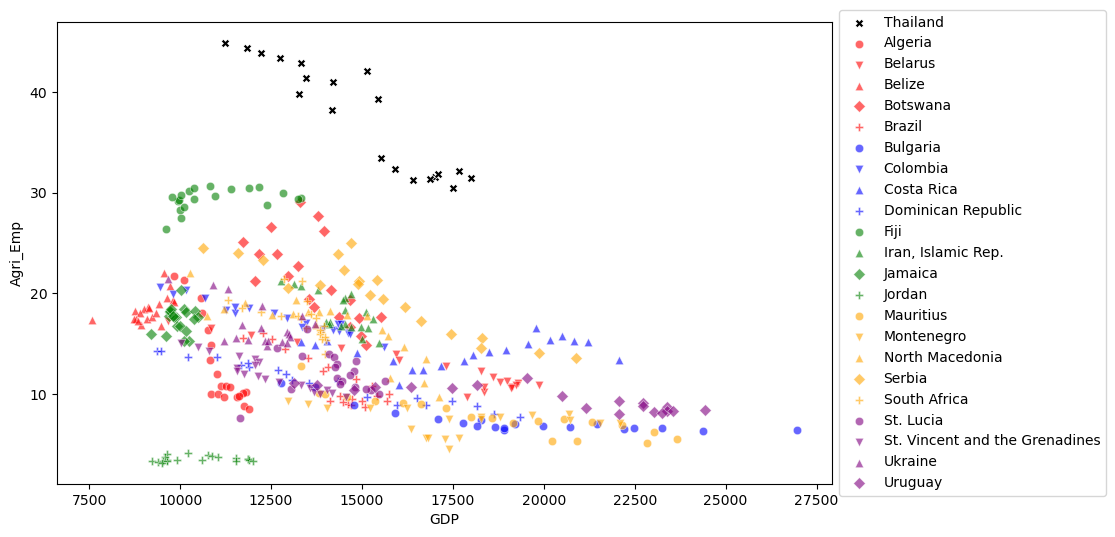

In [86]:
### Scatter GDP and Agricultural Employment for all countries in Similar_Countries_DF_GDP. 
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == "Thailand"], x = 'GDP', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == country], x = 'GDP', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

## Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


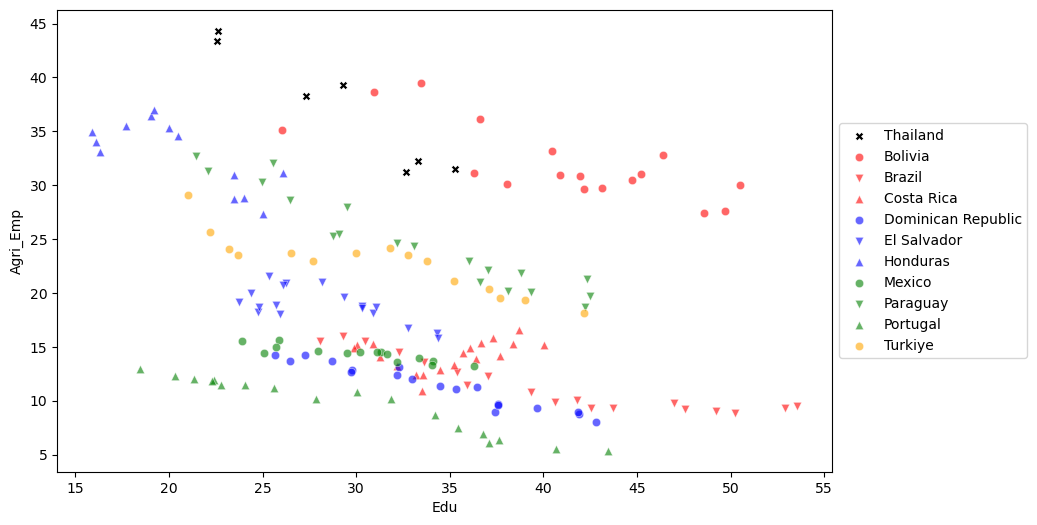

In [93]:
### Scatter Edu and Agricultural Employment.
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == "Thailand"], x = 'Edu', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
markers = ['o', 'v', '^']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == country], x = 'Edu', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

## Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))